# 07. Analysis 

This notebook conducts an initial **exploratory analysis** of the extracted data, employing a range of data analysis libraries including:
- `pandas`, 
- Natural Language Toolkit (`nltk`), 
- Abstract Syntax Tree (`ast`) and 
- `matplotlib.pyplot`. 

Essentially, I have graphically represented the journals with the highest number of publications and also the most frequently used words in the abstracts.

In [317]:
# Libraries Importation

import ast
import nltk
import collections
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [6]:
articles = pd.read_csv('../data/pubmed_articles_clean.csv')

In [7]:
articles.head(2)

,DOI,title,authors,affiliations,journal,year,month,volume,first_page,last_page,PMID,PMCID,abstract,href,json_href,first_author,last_author
0,10.1177/17585732221102399,Surgical management of the spastic elbow,"['Weisang Luo 1 ', ' Matthew Nixon 1 2']","['Countess of Chester Hospital, Chester, UK.',...",Shoulder Elbow,2023.0,Oct,15(5),534,543,37811394.0,PMC10557929,['Background: We performed a retrospective rev...,https://doi.org/10.1177/17585732221102399,https://api.crossref.org/works/10.1177/1758573...,Weisang Luo 1,Matthew Nixon 1 2
1,10.1007/s11571-022-09871-6,Three-dimensional memristive Morris-Lecar mode...,"['Han Bao 1 ', ' Xihong Yu 1 ', ' Quan Xu 1...","[""School of Microelectronics and Control Engin...",Cogn Neurodyn,2023.0,Aug,17(4),1079,1092,37522038.0,PMC10374513,['To characterize the magnetic induction flow ...,https://doi.org/10.1007/s11571-022-09871-6,https://api.crossref.org/works/10.1007/s11571-...,Han Bao 1,Bocheng Bao 1


___

### Visualize the top 30 journals

In [287]:
counts = articles["journal"].value_counts()
counts = counts.sort_values(ascending = False)

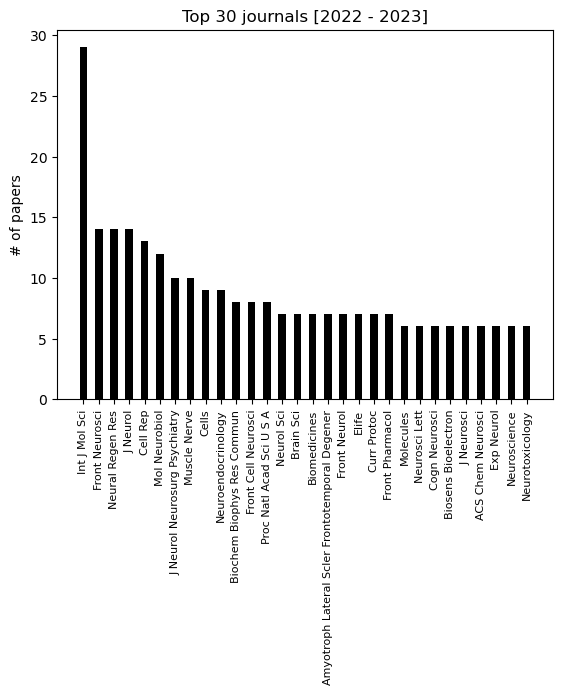

In [288]:
plt.bar(counts.index[:30], 
        counts.values[:30],
        width = 0.5,
        facecolor = 'black')

plt.title('Top 30 journals [2022 - 2023]')

plt.xticks(rotation = 90,
           fontsize = 8)

plt.ylabel('# of papers')
plt.show();

___

### Visualize the top 30 keywords

In [325]:
all_words = ''

for i in range(len(articles)):
    abstracts = ast.literal_eval(articles['abstract'][i])
    if len(abstracts) > 1:
        abstracts = ', '.join(abstracts[:len(abstracts)])
        words = abstracts.split()
        for word in words:
            word = word.strip().lower()
            all_words += word + ' '
    else:
        words = abstracts[0].split()
        for word in words:
            word = word.strip().lower()
            all_words += word + ' '

In [336]:
# Remove articles, prepositions 
# and other not significant words from the corpus

nltk.download('stopwords');

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nexina\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [337]:
list_all_words = all_words.split()

In [338]:
stop_words = nltk.corpus.stopwords.words("english")

words = [word for word in list_all_words if word not in stop_words]

In [343]:
# Remove the special characters

words = [word.replace(":", "").replace(',', '').replace(';', '')
         for word in words]

In [344]:
word_counts = collections.Counter(words)
top_30 = word_counts.most_common(30)

In [345]:
top_30_words = [tuple[0] for tuple in top_30]
top_30_count = [tuple[1] for tuple in top_30]

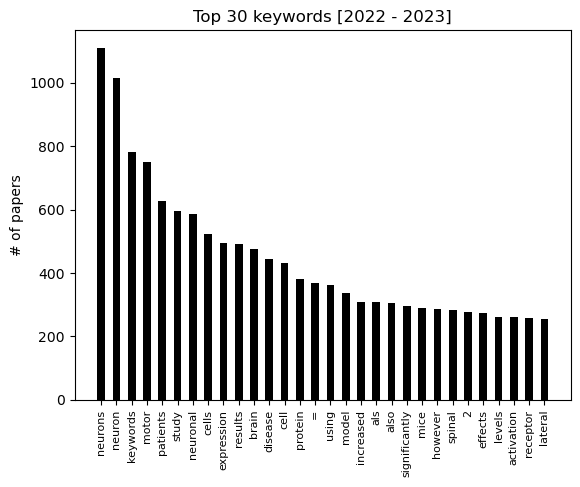

In [346]:
plt.bar(top_30_words, 
        top_30_count,
        width = 0.5,
        facecolor = 'black')

plt.title('Top 30 keywords [2022 - 2023]')

plt.xticks(rotation = 90,
           fontsize = 8)

plt.ylabel('# of papers')
plt.show();